In [102]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os, math

In [83]:
# 获取文件列表
def get_data_path(dir_name):
    data_path = []
    dir_list = os.listdir('./UseDataset/' + dir_name)
    if 'desktop.ini' in dir_list:
        dir_list.remove('desktop.ini')
    elif 'images.rar' in dir_list:
        dir_list.remove('images.rar')
    for i in range(len(dir_list)):
        data_path.append(os.path.join(os.getcwd(), 'UseDataset', dir_name, dir_list[i]))
    return data_path

In [84]:
# 删除不需要的部分
def delete_strings(dir_name):
    data_path = get_data_path(dir_name)
    for i in range(len(data_path)):
        with open(data_path[i], 'rt') as f:
            data = f.read()
            data = data.replace(";", "")
            data = data.replace(" ", "")
        with open(data_path[i], 'wt') as f:
            f.write(data)


In [89]:
# 删除不需要的部分
# delete_strings()

In [97]:
data_path_SA01 = get_data_path('SA01')

In [99]:
data_path_SA01[0]

'c:\\FallAnomalyDetection\\UseDataset\\SA01\\D01_SA01_R01.txt'

In [100]:
Walking_slowly_data = pd.read_csv(data_path_SA01[0], 
                            names=['Acc_X_AD', 'Acc_Y_AD', 'Acc_Z_AD', 'Rot_X', 'Rot_Y', 'Rot_Z', 'Acc_X_MM', 'Acc_Y_MM', 'Acc_Z_MM'])

In [112]:
Walking_slowly_data["Acc_X_AD_grav"] = Walking_slowly_data["Acc_X_AD"].apply( lambda x: x*((2*16)/math.pow(2, 13)))
Walking_slowly_data["Acc_Y_AD_grav"] = Walking_slowly_data["Acc_Y_AD"].apply( lambda x: x*((2*16)/math.pow(2, 13)))
Walking_slowly_data["Acc_Z_AD_grav"] = Walking_slowly_data["Acc_Z_AD"].apply( lambda x: x*((2*16)/math.pow(2, 13)))

In [113]:
Walking_slowly_data

,Acc_X_AD,Acc_Y_AD,Acc_Z_AD,Rot_X,Rot_Y,Rot_Z,Acc_X_MM,Acc_Y_MM,Acc_Z_MM,Acc_X_AD_grav,Acc_Y_AD_grav,Acc_Z_AD_grav
0,17,-179,-99,-18,-504,-352,76,-697,-279,0.066406,-0.699219,-0.386719
1,15,-174,-90,-53,-568,-306,48,-675,-254,0.058594,-0.679688,-0.351562
2,1,-176,-81,-84,-613,-271,-2,-668,-221,0.003906,-0.687500,-0.316406
3,-10,-180,-77,-104,-647,-227,-34,-697,-175,-0.039062,-0.703125,-0.300781
4,-21,-191,-63,-128,-675,-191,-74,-741,-133,-0.082031,-0.746094,-0.246094
...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,-158,-109,-292,-472,-547,-5,-602,-307,0.000000,-0.617188,-0.425781
19995,-12,-154,-96,-355,-527,-509,-31,-600,-248,-0.046875,-0.601562,-0.375000
19996,-15,-166,-84,-399,-560,-475,-66,-640,-208,-0.058594,-0.648438,-0.328125
19997,-18,-188,-76,-434,-577,-438,-80,-738,-186,-0.070312,-0.734375,-0.296875


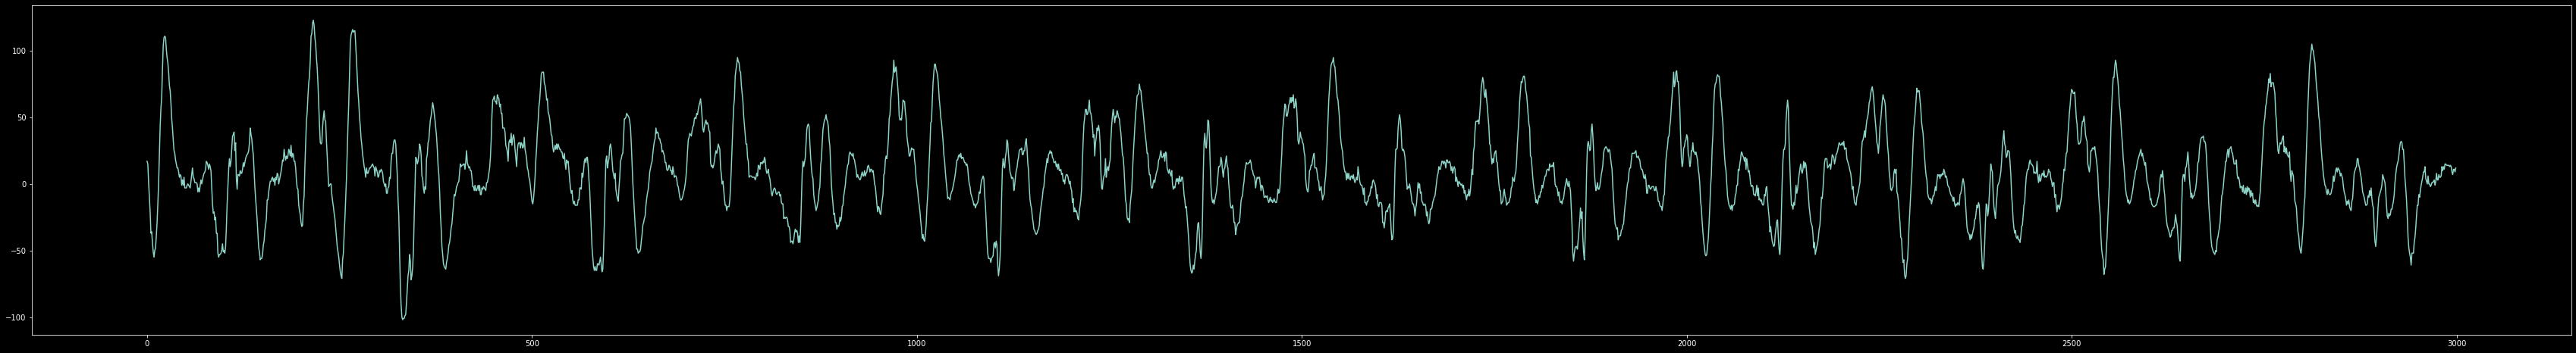

In [136]:
plt.figure(figsize=(60,8))
plt.plot(Walking_slowly_data["Acc_X_AD"][:3000])

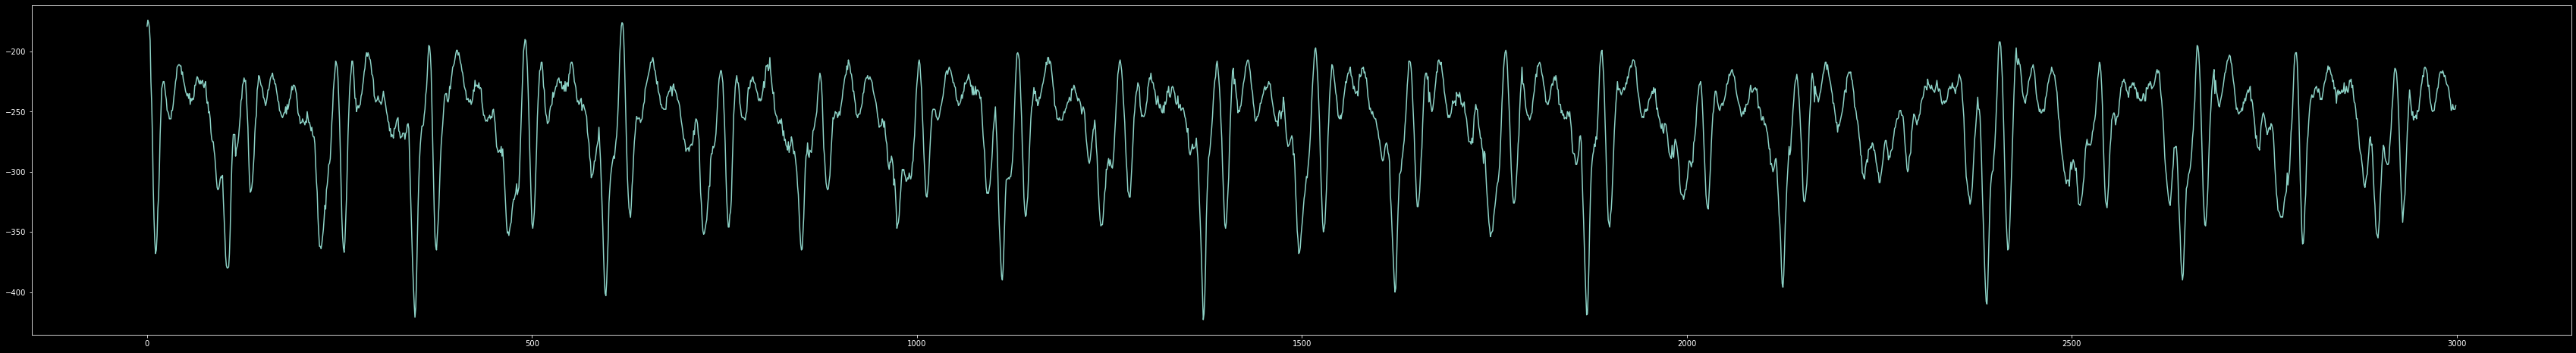

In [137]:
plt.figure(figsize=(60,8))
plt.plot(Walking_slowly_data["Acc_Y_AD"][:3000])

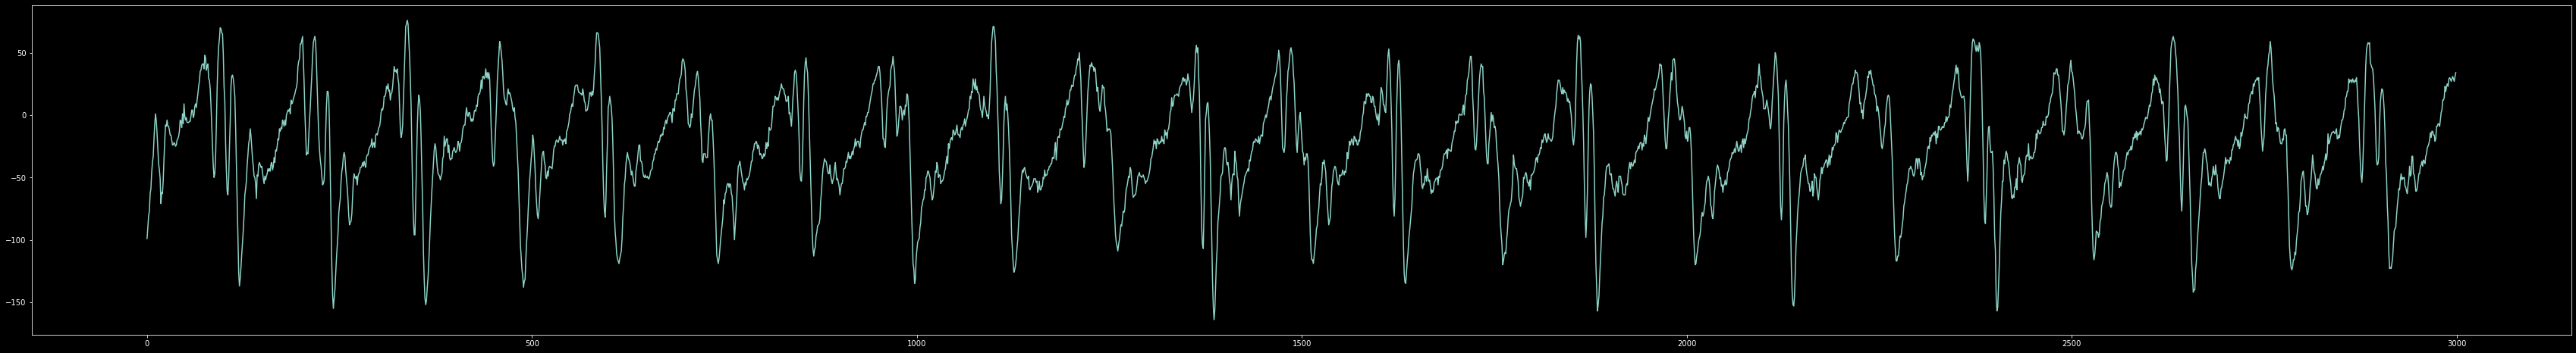

In [138]:
plt.figure(figsize=(60,8))
plt.plot(Walking_slowly_data["Acc_Z_AD"][:3000])

In [139]:
Fall_data = pd.read_csv('C:\\FallAnomalyDetection\\UseDataset\\SA01\\F01_SA01_R01.txt', 
                            names=['Acc_X_AD', 'Acc_Y_AD', 'Acc_Z_AD', 'Rot_X', 'Rot_Y', 'Rot_Z', 'Acc_X_MM', 'Acc_Y_MM', 'Acc_Z_MM'])

In [140]:
Fall_data

,Acc_X_AD,Acc_Y_AD,Acc_Z_AD,Rot_X,Rot_Y,Rot_Z,Acc_X_MM,Acc_Y_MM,Acc_Z_MM
0,-9,-257,-25,84,247,27,-120,-987,63
1,-3,-263,-23,99,258,35,-110,-1016,68
2,-1,-270,-22,114,272,45,-94,-1037,69
3,1,-277,-24,127,286,57,-81,-1062,69
4,2,-281,-25,134,303,70,-71,-1079,63
...,...,...,...,...,...,...,...,...,...
2995,-118,67,-251,-47,16,0,-546,295,-827
2996,-118,69,-247,-45,16,0,-549,292,-822
2997,-118,65,-249,-46,16,0,-543,292,-827
2998,-117,68,-252,-47,18,3,-549,296,-823


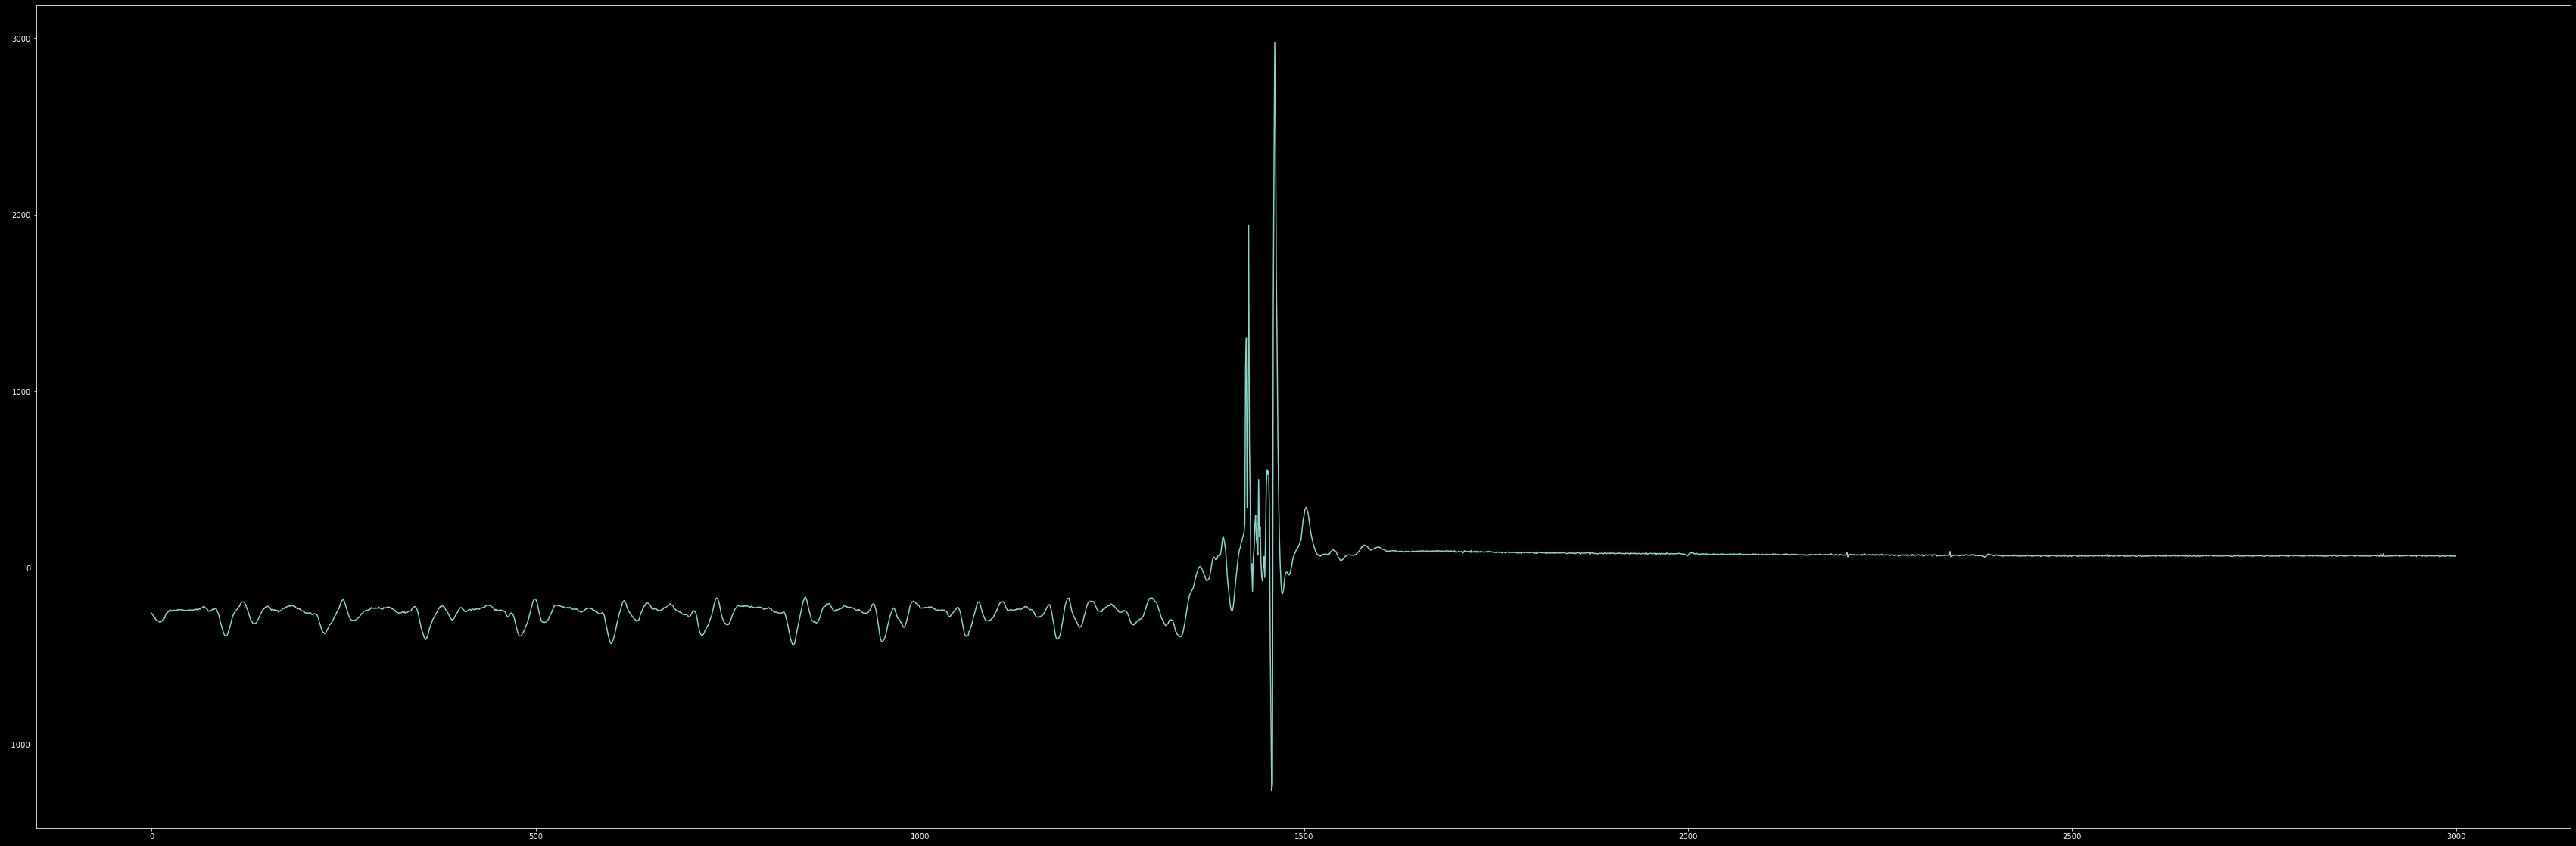

In [142]:
plt.figure(figsize=(60,20))
plt.plot(Fall_data["Acc_Y_AD"][:3000])